In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


C:\Users\user\AppData\Local\Temp\ipykernel_6088\256808149.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dataset = pd.read_csv("Boston.csv")
dataset.head()

,TOWN,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,Nahant,2011,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3
1,Swampscott,2021,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,Swampscott,2022,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,Marblehead,2031,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,Marblehead,2032,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7


Text(0.5, 1.0, 'Prices vs Crime rate')

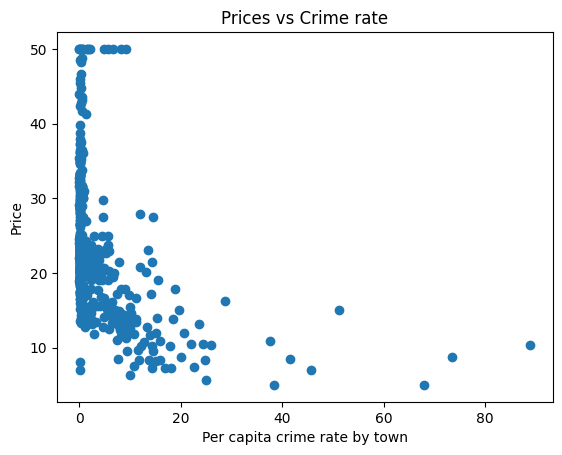

In [3]:
plt.scatter(dataset['CRIM'],dataset['MEDV'])
plt.xlabel('Per capita crime rate by town')
plt.ylabel('Price')
plt.title('Prices vs Crime rate')

In [4]:
# Assuming your dataset is a pandas DataFrame
X = dataset.drop('MEDV', axis=1)  # Drop the 'MEDV' column to get predictors
y = dataset['MEDV']  # Select only the 'MEDV' column as the target

from sklearn.model_selection import train_test_split

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
X = pd.get_dummies(X)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [9]:
from sklearn.metrics import mean_squared_error,r2_score
#The coefficients
print('Coefficient: \n', regressor.coef_)
#The mean squared error
print('Mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))

#Explained variance score : 1 is perfect prediction

print('Explained variance score: {:.2f}'.format(r2_score(y_test,y_pred)))

Coefficient: 
 [-6.82420832e-02  1.35769734e+01 -2.40893031e+01 -6.59747851e-02
  2.92135084e-01 -1.82249367e+00 -1.44889999e+00 -4.24637568e+01
  6.76639982e+00 -8.44620779e-02 -7.45648414e-01 -5.94257576e+00
 -4.86986784e-02 -5.35624672e+00  1.09801721e+01 -2.28800803e+01
 -4.04275322e+01  5.10054344e+00 -5.94296272e+01 -4.75726824e+01
 -3.12636864e+01 -1.21254117e+01 -3.55889473e+01  1.23667014e+01
 -1.75774184e+00 -2.00798687e+01  2.12447579e+01  3.64286178e+01
  1.73287379e+01 -2.81672883e+01 -9.01405105e+00  2.17233268e+00
 -2.10392988e+01  2.88888665e+01  6.76522481e+01  2.37989789e+01
  8.34067641e+00  4.27086135e+01  4.59346371e+01 -4.82579227e+01
  5.36952348e+00 -5.19912889e+01 -1.03532768e+02  3.14377427e+01
 -2.45467398e+01  7.36681634e+01  3.11489262e+01  5.01055283e+01
 -7.54951657e-15  2.22044605e-15  9.49098273e+01  1.35430575e+01
  7.04512590e+01 -4.77264532e+00 -1.77635684e-15 -6.99013946e+01
 -1.19119458e+02  2.80045956e+01 -9.74647968e+01 -1.00219268e+02
  8.484149

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

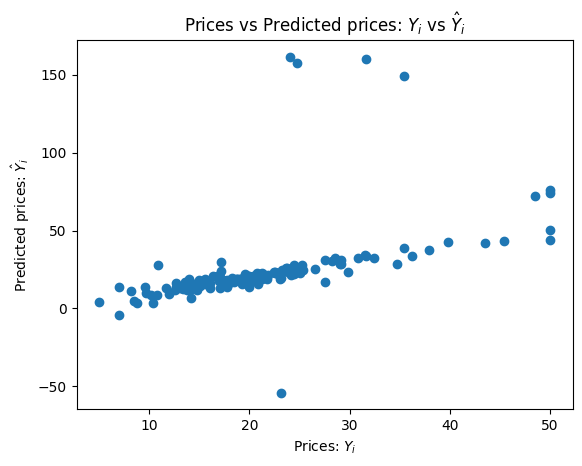

In [11]:
plt.xlabel("Prices: $Y_i$")
plt.scatter(y_test,y_pred)
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
